In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import confusion_matrix

from time import thread_time_ns

In [2]:
df = pd.read_csv('lenovo_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210254 entries, 0 to 3210253
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   laptop     object 
 1   load       float64
 2   code_type  object 
 3   timestamp  float64
 4   llcm       float64
 5   l2ch       float64
 6   l1ch       float64
 7   stalls     float64
 8   label      object 
dtypes: float64(6), object(3)
memory usage: 220.4+ MB


In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3210253 entries, 0 to 3210253
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   laptop     object 
 1   load       float64
 2   code_type  object 
 3   timestamp  float64
 4   llcm       float64
 5   l2ch       float64
 6   l1ch       float64
 7   stalls     float64
 8   label      object 
dtypes: float64(6), object(3)
memory usage: 244.9+ MB


In [5]:
df.describe()

,load,timestamp,llcm,l2ch,l1ch,stalls
count,3.210253e+06,3.210253e+06,3.210253e+06,3.210253e+06,3.210253e+06,3.210253e+06
mean,1.274135e+00,9.355162e+01,3.431496e+04,4.143208e+03,3.168127e+05,2.146464e+06
std,9.616913e-01,7.938262e+01,6.585315e+04,1.179165e+04,4.045876e+05,7.473837e+05
min,0.000000e+00,1.011000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,3.658901e+01,9.280000e+02,3.000000e+00,2.973400e+04,1.909644e+06
50%,2.000000e+00,7.375501e+01,1.235700e+04,1.900000e+01,6.865400e+04,2.497471e+06
75%,2.000000e+00,1.238980e+02,2.385600e+04,1.379000e+03,5.264630e+05,2.571707e+06
max,2.000000e+00,4.013360e+02,2.668517e+06,2.636150e+05,2.662117e+07,7.697978e+07


In [6]:
samples=df.drop(columns=['label', 'code_type', 'timestamp', 'load', 'laptop'])
#samples['laptop'].replace(['lenovo', 'asus', 'dell'], [1, 2, 3], inplace=True)
#samples['laptop'] = samples['laptop'].astype("int64")
samples

,llcm,l2ch,l1ch,stalls
0,3813.0,28.0,540.0,650876.0
1,9035.0,1.0,1014.0,2277749.0
2,9712.0,2.0,67.0,2451457.0
3,10072.0,0.0,755.0,2461971.0
4,9779.0,2.0,82.0,2464499.0
...,...,...,...,...
3210249,141017.0,3701.0,413914.0,2058460.0
3210250,140537.0,3486.0,418182.0,2032395.0
3210251,140655.0,3890.0,410540.0,2066397.0
3210252,141409.0,3607.0,415259.0,2059597.0


In [7]:
labels = df['label'].replace(['no_attack', 'attack'], [0, 1])
labels = labels.astype('int64')
labels

0          1
1          1
2          1
3          1
4          1
          ..
3210249    0
3210250    0
3210251    0
3210252    0
3210253    0
Name: label, Length: 3210253, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(samples, labels, train_size = 0.5, random_state= 33, shuffle = True)

In [9]:
def evaluate(model):
    # https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
    n = tn + fp + fn + tp
    return f'accuracy: {(tp+tn)*100.0/n}%\nfalse positives: {fp*100.0/n}%\nfalse negatives: {fn*100.0/n}%'

In [10]:
log_reg_model = LogisticRegression(random_state=33)
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=33)

In [11]:
log_reg_model.score(X_test, y_test)

0.9973279372909434

In [12]:
print(evaluate(log_reg_model))

accuracy: 99.73279372909434%
false positives: 0.07706555306838649%
false negatives: 0.19014071783728018%


In [13]:
dec_tree_model = DecisionTreeClassifier(max_depth = 5, random_state = 33)
dec_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=33)

In [14]:
dec_tree_model.score(X_test, y_test)

0.9980356694517007

In [15]:
print(evaluate(dec_tree_model))

accuracy: 99.80356694517008%
false positives: 0.004921728934844408%
false negatives: 0.19151132589508493%


[Text(0.5, 0.9166666666666666, 'x[2] <= 88077.0\ngini = 0.488\nsamples = 1605126\nvalue = [676507, 928619]'),
 Text(0.2847222222222222, 0.75, 'x[0] <= 429.0\ngini = 0.011\nsamples = 933756\nvalue = [5326, 928430]'),
 Text(0.1388888888888889, 0.5833333333333334, 'x[1] <= 11.0\ngini = 0.47\nsamples = 8285\nvalue = [5155, 3130]'),
 Text(0.08333333333333333, 0.4166666666666667, 'x[0] <= 64.5\ngini = 0.492\nsamples = 7135\nvalue = [4006, 3129]'),
 Text(0.05555555555555555, 0.25, 'x[3] <= 4880.5\ngini = 0.491\nsamples = 7085\nvalue = [4006, 3079]'),
 Text(0.027777777777777776, 0.08333333333333333, 'gini = 0.492\nsamples = 7065\nvalue = [3986, 3079]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]'),
 Text(0.19444444444444445, 0.4166666666666667, 'x[3] <= 20437.5\ngini = 0.002\nsamples = 1150\nvalue = [1149, 1]'),
 Text(0.16666666666666666, 0.25, 'gini = 0.0\nsamples = 1\

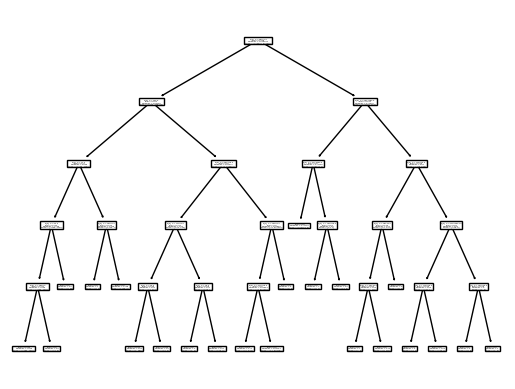

In [16]:
plot_tree(dec_tree_model)

In [17]:
xgb_model = XGBClassifier(max_depth=2, random_state = 33, n_estimators = 10)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=33, ...)

In [18]:
xgb_model.score(X_test, y_test)

0.9978587364115113

In [19]:
print(evaluate(xgb_model))

accuracy: 99.78587364115114%
false positives: 0.012709274717826066%
false negatives: 0.2014170841310376%


In [20]:
cb_model = CatBoostClassifier(n_estimators = 10, random_state = 33, max_depth = 2)
cb_model.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.3161621	total: 79.1ms	remaining: 712ms
1:	learn: 0.1750973	total: 107ms	remaining: 429ms
2:	learn: 0.1028277	total: 132ms	remaining: 308ms
3:	learn: 0.0621955	total: 164ms	remaining: 246ms
4:	learn: 0.0390049	total: 195ms	remaining: 195ms
5:	learn: 0.0257484	total: 220ms	remaining: 147ms
6:	learn: 0.0178354	total: 246ms	remaining: 105ms
7:	learn: 0.0126016	total: 271ms	remaining: 67.8ms
8:	learn: 0.0093772	total: 297ms	remaining: 33ms
9:	learn: 0.0073801	total: 327ms	remaining: 0us


In [21]:
cb_model.score(X_test, y_test)

0.997845653334596

In [22]:
print(evaluate(cb_model))

accuracy: 99.7845653334596%
false positives: 0.011650168491340561%
false negatives: 0.20378449804906404%


In [23]:
labels.sum()

1855307

In [24]:
len(labels)

3210253

In [25]:
labels.sum()*100.0/len(labels)

57.793170818623956

In [26]:
start = thread_time_ns()
log_reg_model.predict(X_test)
stop = thread_time_ns()
log_reg_time = (stop - start)/len(y_test)
print(f'average time for log_reg_model: {log_reg_time}ns,\nnumber of samples: {len(y_test)}')

average time for log_reg_model: 7.99499665758535ns,
number of samples: 1605127


In [27]:
start = thread_time_ns()
dec_tree_model.predict(X_test)
stop = thread_time_ns()
dec_tree_time = (stop - start)/len(y_test)
print(f'average time for dec_tree_model: {dec_tree_time}ns,\nnumber of samples: {len(y_test)}')

average time for dec_tree_model: 30.087877781633477ns,
number of samples: 1605127


In [28]:
start = thread_time_ns()
cb_model.predict(X_test)
stop = thread_time_ns()
cb_time = (stop - start)/len(y_test)
print(f'average time for cb_model: {cb_time}ns,\nnumber of samples: {len(y_test)}')

average time for cb_model: 64.51587008380022ns,
number of samples: 1605127


In [29]:
code_types = ['attack', 'no_flush', 'random', 'attack_ntmp', 'stream', 'rh4', 'rh8', 'rh9', 'rh10', 'rh20', 'double_sided']
n = df.index.size
s = 0
for ct in code_types:
    m = df.loc[df['code_type'] == ct].index.size
    print(f'{ct}: {m*100/n}%')
    s += m*100/n
print(f'total = {s}')
print(f'samples: {n}')

attack: 5.570620134923945%
no_flush: 10.910105839010196%
random: 18.00094883487376%
attack_ntmp: 8.69781914384941%
stream: 13.295774507492089%
rh4: 6.846500883263718%
rh8: 6.7450135550064125%
rh9: 6.710031888452406%
rh10: 6.662154042064597%
rh20: 6.375354216630278%
double_sided: 10.185676954433186%
total = 100.00000000000001
samples: 3210253
